In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
#from sklearn import preprocessing, cross_validation
import pandas as pd

**1st Problem statement**

In [0]:
import numpy as np

np.random.seed(123)

allwalks = []

for i in range(250):
    randwalk = [0]
    for x in range(100):
        step = randwalk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2 :
            step = max(0, step - 1)

        elif dice<=5:
            step += 1

        else:
            step = step + np.random.randint(1,7)
        
    print(step)

**2nd Problem statment**

---



**Random data for multiple linear regression**

In [0]:
import numpy as np
import pandas as pd
import scipy
import random
from scipy.stats import norm
random.seed(1)
n_features = 4
X = []
for i in range(n_features):
  X_i = scipy.stats.norm.rvs(0, 1, 100)
  X.append(X_i)
#print(X)
eps = scipy.stats.norm.rvs(0, 0.25,100)
y = 1 + (0.4 * X[0]) + eps + (0.5 * X[1]) + (0.3 * X[2]) + (0.4 * X[3])
data_mlr = {'X0': X[0],'X1':X[1],'X2':X[2],'X3':X[3],'Y': y }
df = pd.DataFrame(data_mlr)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
#df.to_csv('file1.csv')

**Random data for logistic regression**

In [0]:
n_features = 4
X = []
for i in range(n_features):
  X_i = scipy.stats.norm.rvs(0, 1, 100)
  X.append(X_i)
#print(X)
a1 = (np.exp(1 + (0.5 * X[0]) + (0.4 * X[1]) + (0.3 * X[2]) + (0.5 * X[3]))/(1 + np.exp(1 + (0.5 * X[0]) + (0.4 * X[1]) + (0.3 * X[2]) + (0.5 * X[3]))))
#print(a1)
y1 = []
for i in a1:
  if (i>=0.5):
    y1.append(1)
  else:
    y1.append(0)
#print(y1)
data_lr = {'X0': X[0],'X1':X[1],'X2':X[2],'X3':X[3],'Y': y1 }
df1 = pd.DataFrame(data_lr)
print(df1.head())
print(df1.tail())
print(df1.info())
print(df1.describe())


**Random data for K means clustering**

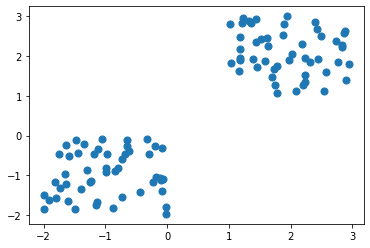

         X0        X1
0 -0.439029 -1.425859
1 -0.985709 -0.923332
2 -0.687021 -0.451348
3 -1.756376 -0.449062
4 -1.813224 -1.171191
          X0        X1
95  2.939853  1.810947
96  1.186396  2.179446
97  2.208860  1.261319
98  1.210466  2.840515
99  2.839544  2.284540
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      100 non-null    float64
 1   X1      100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
               X0          X1
count  100.000000  100.000000
mean     0.472882    0.573777
std      1.585833    1.631607
min     -1.992684   -1.966130
25%     -1.008860   -0.972040
50%      0.503720    0.493607
75%      1.885717    1.976838
max      2.939853    2.999077


In [26]:
X_a= -2 * np.random.rand(100,2)
X_b = 1 + 2 * np.random.rand(50,2)
X_a[50:100, :] = X_b
plt.scatter(X_a[ : , 0], X_a[ :, 1], s = 50)
plt.show()
data_kmeans = {'X0': X_a[:,0],'X1':X_a[:,1]}
df3 = pd.DataFrame(data_kmeans)
print(df3.head())
print(df3.tail())
print(df3.info())
print(df3.describe())

**3rd problem statement**

**Linear regression using Gradient descent**

In [11]:
X = df.iloc[:,0].values
#print(X)
y = df.iloc[:,4].values
b1 = 0
b0 = 0
l = 0.001
epochs = 100
 
n = float(len(X))
for i in range(epochs):
  y_p = b1*X + b0
  loss = np.sum(y_p - y1)**2
  d1 = (-2/n) * sum(X * (y - y_p))
  d0 = (-2/n) * sum(y - y_p)
  b1 = b1 - (l*d1)
  b0 = b0 - (l*d0)

print(b1,b0)



0.08297726333408594 0.18006939723867305


**Logistic regression using Gradient descent**

In [13]:
X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values

def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat)))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz)
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)





0.6931471805599453
0.4038817505870492
0.4028319093088873
0.4018135662477166
0.40082630712090966
0.3998696947179652
0.39894326808188363
0.39804654207159185
0.3971790073169705
0.39634013056778944


Linear regression using L1 regualrization

In [14]:
X = df.iloc[:,0].values
#print(X)
y = df.iloc[:,4].values
b1 = 0
b0 = 0
l = 0.001
epochs = 100
lam = 0.1
 
n = float(len(X))
for i in range(epochs):
  y_p = b1*X + b0
  loss = np.sum(y_p - y1)**2 + (lam * b1)
  d1 = (-2/n) * sum(X * (y - y_p)) + lam
  d0 = (-2/n) * sum(y - y_p)
  b1 = b1 - (l*d1)
  b0 = b0 - (l*d0)

print(b1,b0)



0.0738712823591653 0.18008044130900397


Linear regression using L2 regualrization

In [15]:
X = df.iloc[:,0].values
#print(X)
y = df.iloc[:,4].values
b1 = 0
b0 = 0
l = 0.001
epochs = 100
lam = 0.1
 
n = float(len(X))
for i in range(epochs):
  y_p = b1*X + b0
  loss = np.sum(y_p - y1)**2 + ((lam/2) * b1)
  d1 = (-2/n) * sum(X * (y - y_p)) + (lam *b1)
  d0 = (-2/n) * sum(y - y_p)
  b1 = b1 - (l*d1)
  b0 = b0 - (l*d0)

print(b1,b0)

0.08257998381739863 0.1800697210778034


Logistic regression using L1 regualrization

In [16]:
X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values
lam = 0.1
def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat))) + (lam * (np.sum(W)))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz) + lam
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)





0.6931471805599453
0.005627403091365557
-0.38866525731530316
-0.7785099133890219
-1.1639874680940294
-1.5451782557334988
-1.9221619214330494
-2.295017312851155
-2.663822383546498
-3.0286541074087983


**Logistic regression using L2 regualrization**

In [17]:
X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values
lam = 0.1
def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat))) + (lam * (np.sum(np.square(W))))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz) + lam * W
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)



0.6931471805599453
0.4049582381035769
0.4070322875898494
0.4110320657537498
0.4168107591568584
0.42422822137927124
0.4331508591929805
0.4434515173335084
0.4550093596939461
0.4677097451328721


**K Means Clustering Algorithm**

In [0]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
colors = 10*["c","b","y","p","k"]

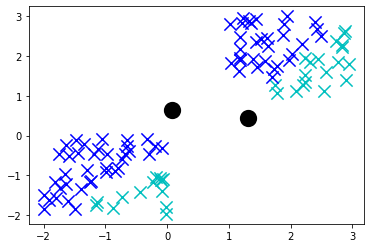

In [35]:
X = df3.iloc[:,0:2].values
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

**4th Problem statement**

**Linear Regression from scratch using OOPS**

In [0]:
import numpy as np

class LinearRegressionModel():

    def __init__(self, dataset, learning_rate, num_iterations):
        self.dataset = np.array(dataset)
        self.b = 0  
        self.m = 0  
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.M = len(self.dataset)
        self.total_error = 0

    def apply_gradient_descent(self):
        for i in range(self.num_iterations):
            self.do_gradient_step()

    def do_gradient_step(self):
        b_summation = 0
        m_summation = 0
        for i in range(self.M):
            x_value = self.dataset[i, 0]
            y_value = self.dataset[i, 1]
            b_summation += (((self.m * x_value) + self.b) - y_value) 
            m_summation += (((self.m * x_value) + self.b) - y_value) * x_value
        self.b = self.b - (self.learning_rate * (1/self.M) * b_summation)
        self.m = self.m - (self.learning_rate * (1/self.M) * m_summation)
      
    def compute_error(self):
        for i in range(self.M):
            x_value = self.dataset[i, 0]
            y_value = self.dataset[i, 1]
            self.total_error += ((self.m * x_value) + self.b) - y_value
        return self.total_error

    def __str__(self):
        return "Results: b: {}, m: {}, Final Total error: {}".format(round(self.b, 2), round(self.m, 2), round(self.compute_error(), 2))

    def get_prediction_based_on(self, x):
        return round(float((self.m * x) + self.b), 2) # Type: Numpy float.

def main():
    school_dataset = np.genfromtxt(DATASET_PATH, delimiter=",")
    lr = LinearRegressionModel(school_dataset, 0.0001, 1000)
    lr.apply_gradient_descent()
    hours = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    for hour in hours:
        print("Studied {} hours and got {} points.".format(hour, lr.get_prediction_based_on(hour)))
    print(lr)

if __name__ == "__main__": main()

**Logistic Regression from scratch using OOPS**

In [0]:
class LogisticRegression:
  def __init__(self, learning_rate, num_iters, fit_intercept = True, verbose = False):
    self.learning_rate = learning_rate
    self.num_iters = num_iters
    self.fit_intercept = fit_intercept
    self.verbose = verbose
  def __add_intercept(self, X):
    intercept = np.ones((X.shape[0],1))
    return np.concatenate((intercept,X),axis=1)
  def __sigmoid(self,z):
    return 1/(1+np.exp(-z))
  def __loss(self, h, y):
    return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
  
  def fit(self,X,y):
    if self.fit_intercept:
      X = self.__add_intercept(X)
    self.theta = np.zeros(X.shape[1])
    
    for i in range(self.num_iters):
      z = np.dot(X,self.theta)
      h = self.__sigmoid(z)
      gradient = np.dot(X.T,(h-y))/y.size
      
      self.theta -= self.learning_rate * gradient
      
      z = np.dot(X,self.theta)
      h = self.__sigmoid(z)
      loss = self.__loss(h,y)
      
      if self.verbose == True and i % 1000 == 0:
        print(f'Loss: {loss}\t')
  def predict_probability(self,X):
    if self.fit_intercept:
      X = self.__add_intercept(X)
    return self.__sigmoid(np.dot(X,self.theta))
  def predict(self,X):
    return (self.predict_probability(X).round())

**K Means from scratch using OOPS concepts**

In [0]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
colors = 10*["c","b","y","p","k"]